### Инжиниринг категориальных признаков  
#### Цель работы  
Ознакомиться с основными приемами работы с категориальными атрибутами в датасетах для машинного обучения.  

#### Содержание работы  
Загрузите прилагаемые к этой работе два датасета - Титаник и Customer support. Выведите основную информацию по каждому датасету и сделайте выводы.  
Визуализируйте распределение каждого категориального признака в датасете Customer support. Учитывайте количество уникальных значений.  
Исследуйте связь каждого признака датасета Customer support с целевой переменной. Сделайте предварительный вывод о значимости признаков.  
Где целесообразно, проведите укрупнение категорий, путем объединения разных значений в столбце.  
Добавьте к датасету новый столбец, содержащий агрегированную информацию, которая предположительно будет полезна для моделирования целевой переменной.  
Заполните отсутствующие значения в датасете.  
На примере датасета Титаник проведите преобразование категориальных переменных разных шкал в численные.  
В датасете Customer support удалите лишние столбцы и преобразуйте все категориальные переменные через get_dummies()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split

In [2]:
CS_data = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML5.3%20categorical%20features/data/Customer_support_data.csv")
CS_data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [3]:
CS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [4]:
CS_data.describe(include="all")

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,15/08/2023 10:59,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


In [5]:
T_data = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML5.3%20categorical%20features/data/titanic.csv")
T_data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
T_data.describe(exclude=[np.number])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,491,1,577,7,4,644


<Axes: xlabel='channel_name', ylabel='Count'>

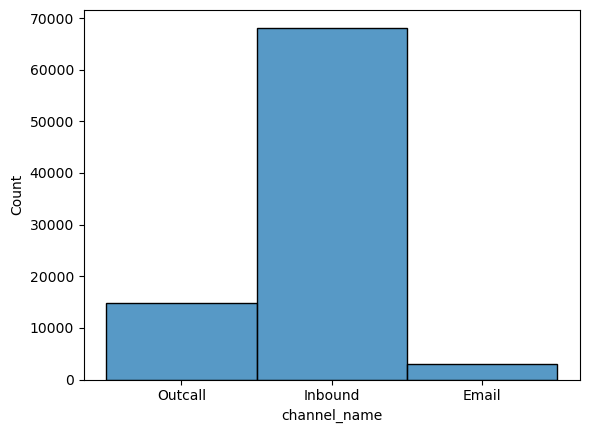

In [7]:
import seaborn as sns
sns.histplot(data=CS_data, x="channel_name")

In [8]:
CS_data.channel_name.value_counts()

channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64

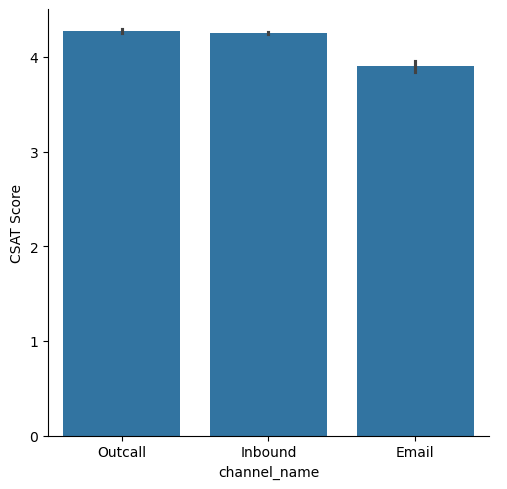

In [9]:
sns.catplot(data=CS_data, x="channel_name", y="CSAT Score", kind="bar")

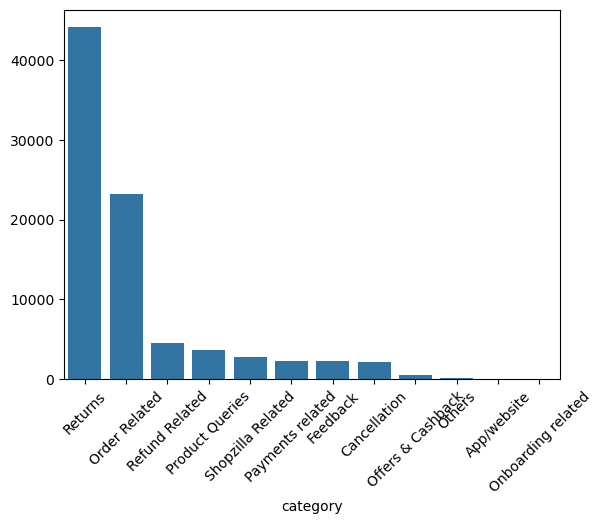

In [10]:
counts = CS_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

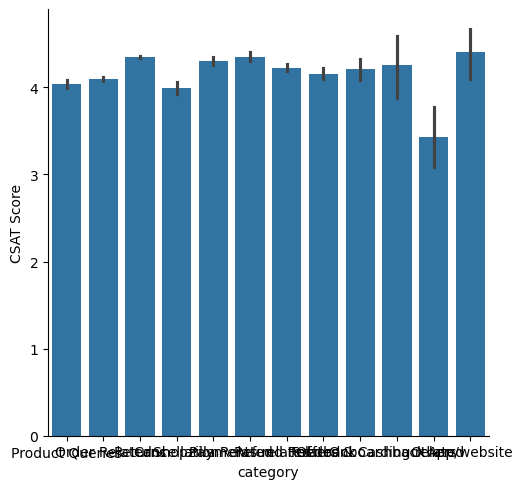

In [11]:

sns.catplot(data=CS_data, x="category", y="CSAT Score", kind="bar")


In [12]:
CS_data.category.value_counts()

category
Returns               44097
Order Related         23215
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/website              84
Onboarding related       65
Name: count, dtype: int64

In [13]:
CS_data['Sub-category'].value_counts()  

Sub-category
Reverse Pickup Enquiry              22389
Return request                       8523
Delayed                              7388
Order status enquiry                 6922
Installation/demo                    4116
Fraudulent User                      4108
Product Specific Information         3589
Refund Enquiry                       2665
Wrong                                2597
Missing                              2556
UnProfessional Behaviour             2294
General Enquiry                      1945
Not Needed                           1920
Service Centres Related              1875
Refund Related Issues                1800
Invoice request                      1465
Online Payment Issues                1079
Seller Cancelled Order               1059
Priority delivery                     972
Exchange / Replacement                896
Customer Requested Modifications      805
Payment related Queries               743
Signup Issues                         489
Damaged              

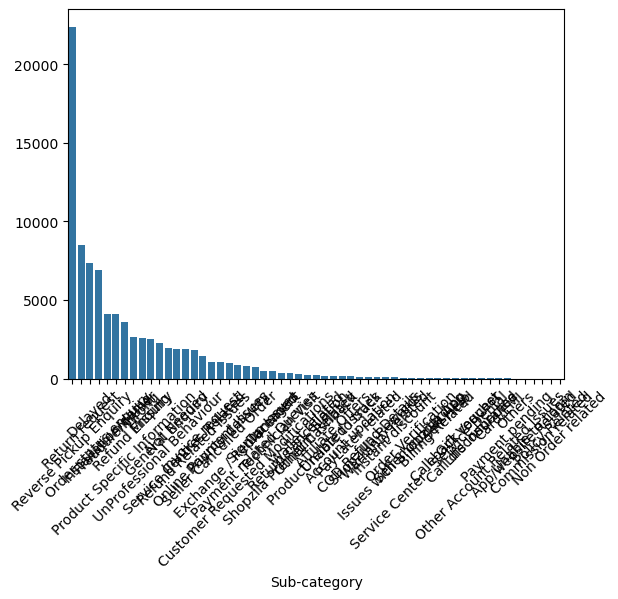

In [14]:
counts = CS_data['Sub-category'].value_counts()

sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)  
plt.show()

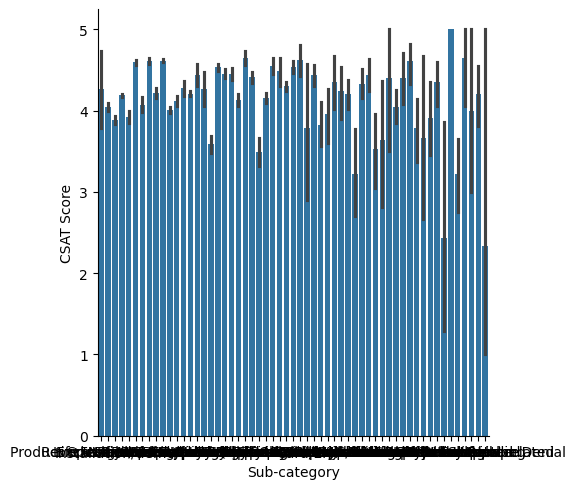

In [15]:
sns.catplot(data=CS_data, x="Sub-category", y="CSAT Score", kind="bar")

In [19]:
CS_data['Customer Remarks'].value_counts().head(20)

Customer Remarks
Good             1390
Good             1158
Very good         569
Nice              316
Thanks            276
Ok                259
No                258
Thank you         244
Nice              239
Very good         236
Excellent         171
Thanks            159
Good ??           148
Good service      133
Very nice         122
Thank you          97
??                 95
Nothing            88
5                  76
Good job           71
Name: count, dtype: int64

In [20]:
CS_data['Customer_City'].value_counts().head(20)

Customer_City
HYDERABAD      722
NEW DELHI      688
PUNE           435
MUMBAI         406
BANGALORE      352
CHENNAI        271
KOLKATA        270
LUCKNOW        254
AHMEDABAD      253
JAIPUR         243
GURGAON        215
PATNA          199
SURAT          175
ALLAHABAD      161
KANPUR         138
VARANASI       137
THANE          129
GHAZIABAD      120
BHUBANESWAR    117
VADODARA       105
Name: count, dtype: int64

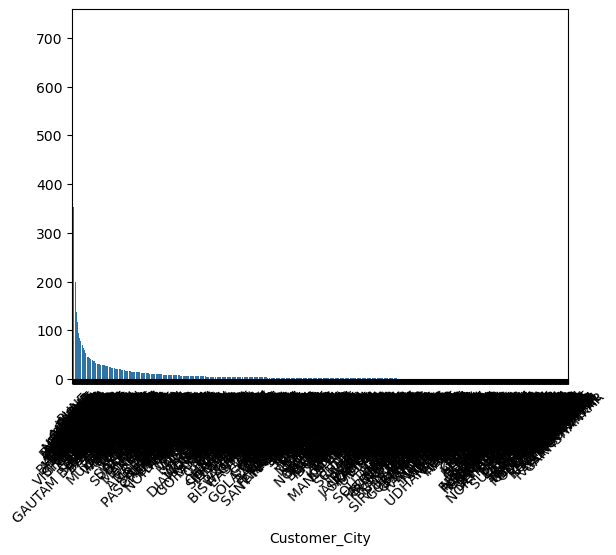

In [21]:
counts = CS_data['Customer_City'].value_counts()

sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)  
plt.show()

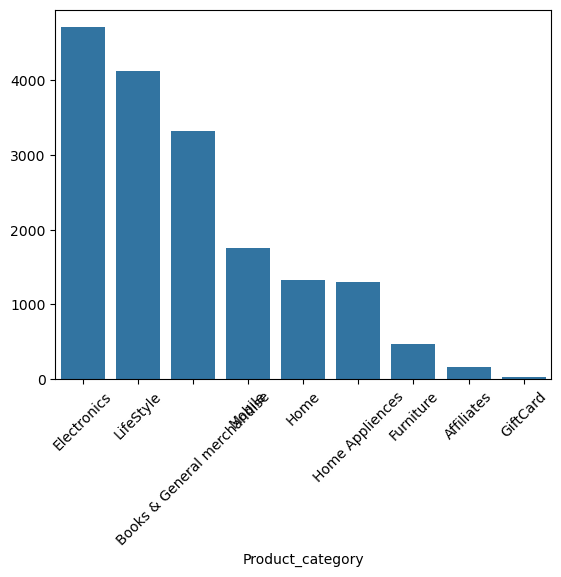

In [22]:
counts = CS_data['Product_category'].value_counts()

sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)  
plt.show()

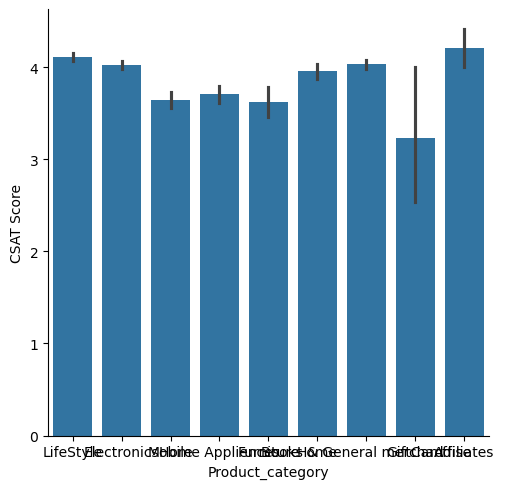

In [23]:
sns.catplot(data=CS_data, x="Product_category", y="CSAT Score", kind="bar")

In [24]:
CS_data['Agent_name'].value_counts().head(20) 

Agent_name
Wendy Taylor           429
Timothy Huff           265
David Smith            264
Jamie Smith            253
Kayla Wilson           216
Julie Williams         200
Mrs. Jennifer Stone    200
Sharon Bullock         195
Matthew White PhD      192
Anthony Booth          177
Tina Harrington        177
Kristin Campbell       176
Brianna Wolf           176
Rebecca Walker         176
Jennifer Hernandez     174
Rebecca Graham         173
William Carey DVM      169
Ryan Thompson          167
Brandon Frost          161
Brian Young            160
Name: count, dtype: int64

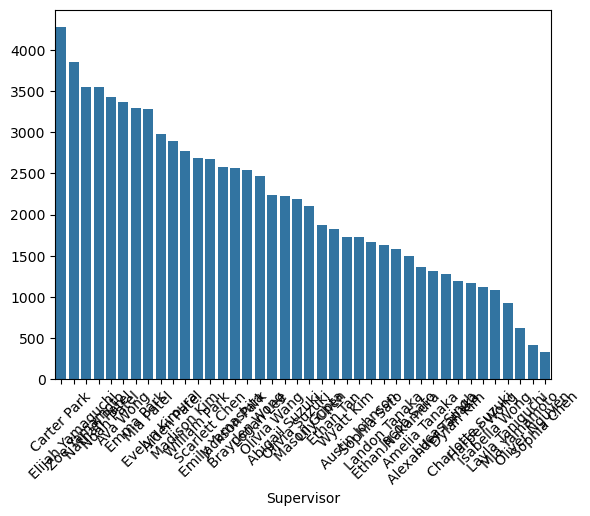

In [25]:
counts = CS_data['Supervisor'].value_counts()

sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)  
plt.show()

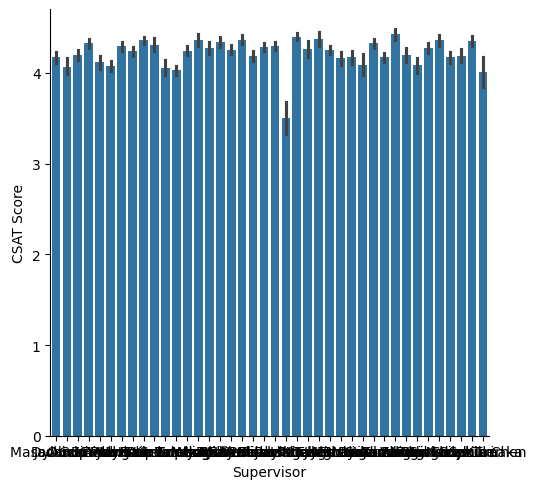

In [26]:
sns.catplot(data=CS_data, x="Supervisor", y="CSAT Score", kind="bar")

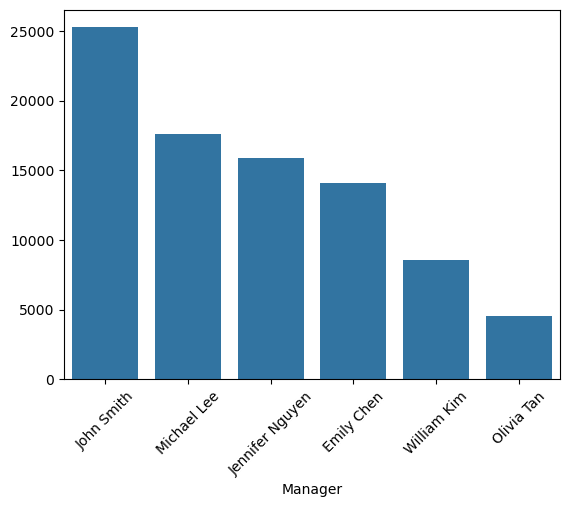

In [27]:
counts = CS_data['Manager'].value_counts()

sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)  
plt.show()

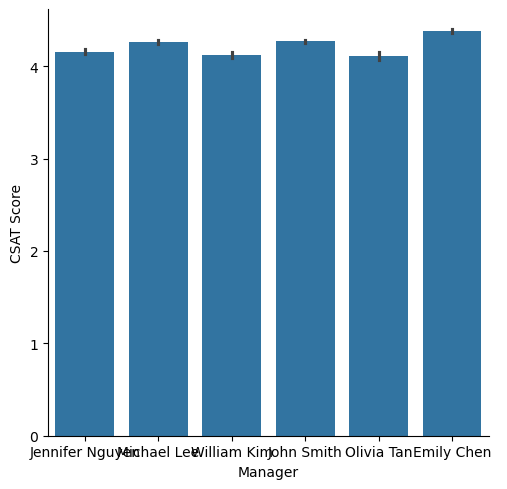

In [28]:
sns.catplot(data=CS_data, x="Manager", y="CSAT Score", kind="bar")

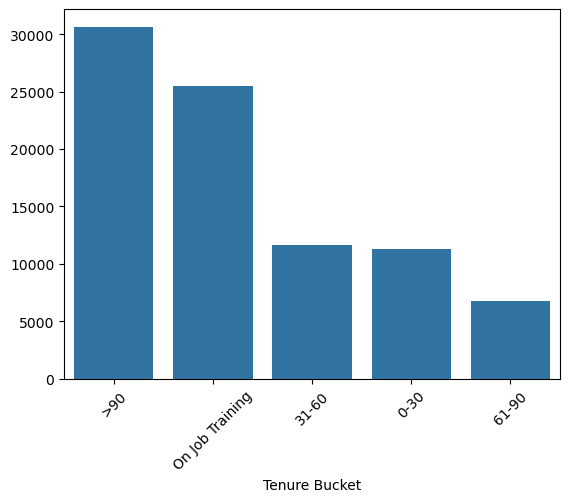

In [29]:
counts = CS_data['Tenure Bucket'].value_counts()

sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)  
plt.show()

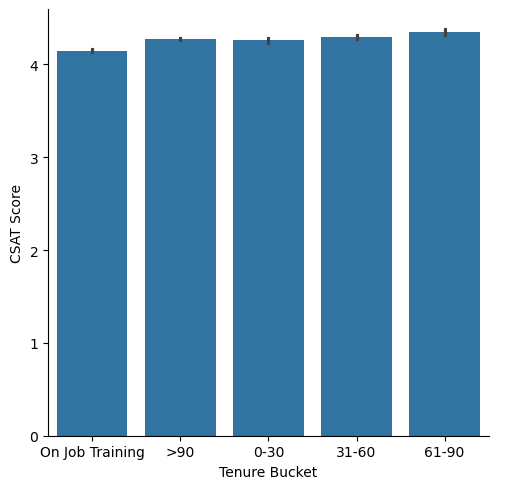

In [30]:
sns.catplot(data=CS_data, x="Tenure Bucket", y="CSAT Score", kind="bar")

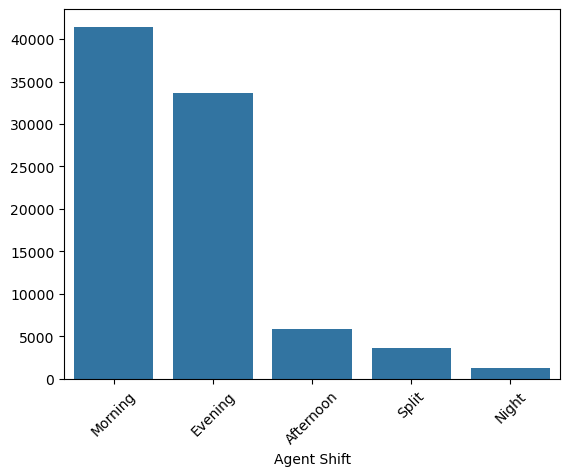

In [31]:
counts = CS_data['Agent Shift'].value_counts()

sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)  
plt.show()

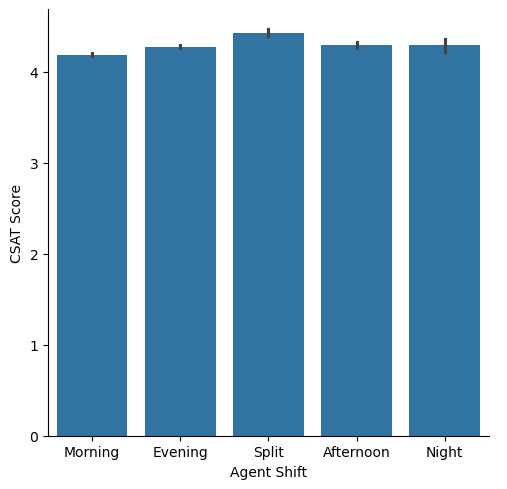

In [32]:
sns.catplot(data=CS_data, x="Agent Shift", y="CSAT Score", kind="bar")

In [33]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)

In [34]:
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)

In [35]:
CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry", 
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

In [36]:
CS_data.groupby(["Agent_name"]).agg({'Agent_name': 'count'})

,Agent_name
Agent_name,
Aaron Edwards,93
Aaron Romero,59
Abigail Gonzalez,25
Adam Barnett,56
Adam Hammond,60
...,...
Yesenia Bowers,50
Zachary Collins,75
Zachary Ford,62


In [37]:
CS_data['Agent_count'] = CS_data.groupby(["Agent_name"])["Agent_name"].transform('count')

In [38]:
CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})

,Agent_name
Supervisor,
Abigail Suzuki,38
Aiden Patel,41
Alexander Tanaka,15
Amelia Tanaka,19
Austin Johnson,29
Ava Wong,70
Brayden Wong,45
Carter Park,64
Charlotte Suzuki,22


In [39]:
CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')

In [40]:
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')

In [41]:
CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')

In [42]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)

In [43]:
T_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

C:\Users\Sofia\AppData\Local\Temp\ipykernel_18596\678409162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  T_data.Pclass.replace({
C:\Users\Sofia\AppData\Local\Temp\ipykernel_18596\678409162.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T_data.Pclass.replace({


In [44]:
from sklearn.preprocessing import OneHotEncoder
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[['Embarked']])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [45]:
OH_embarked.get_feature_names_out(['Embarked'])

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype=object)

In [46]:
dummies = pd.DataFrame(OH_embarked.fit_transform(T_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']), 
                       index = T_data.index)

In [47]:
T_dummies = pd.concat([T_data, dummies]).drop(["Embarked"], axis=1)

In [48]:
CS_dropped = CS_data.drop([
    "Unique id",
    "Sub-category",
    "Customer Remarks",
    "Customer_City", 
    "Agent_name", 
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)

In [49]:
CS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         85907 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  85907 non-null  object 
 14  Agent_name            

In [50]:
CS_dummies = pd.get_dummies(CS_dropped)